In [1]:
from torch_snippets import show, read, subplots, cv2, np

In [2]:
IMG = read('road_image3.JPG',1)

In [3]:
img = np.uint8(IMG.copy())

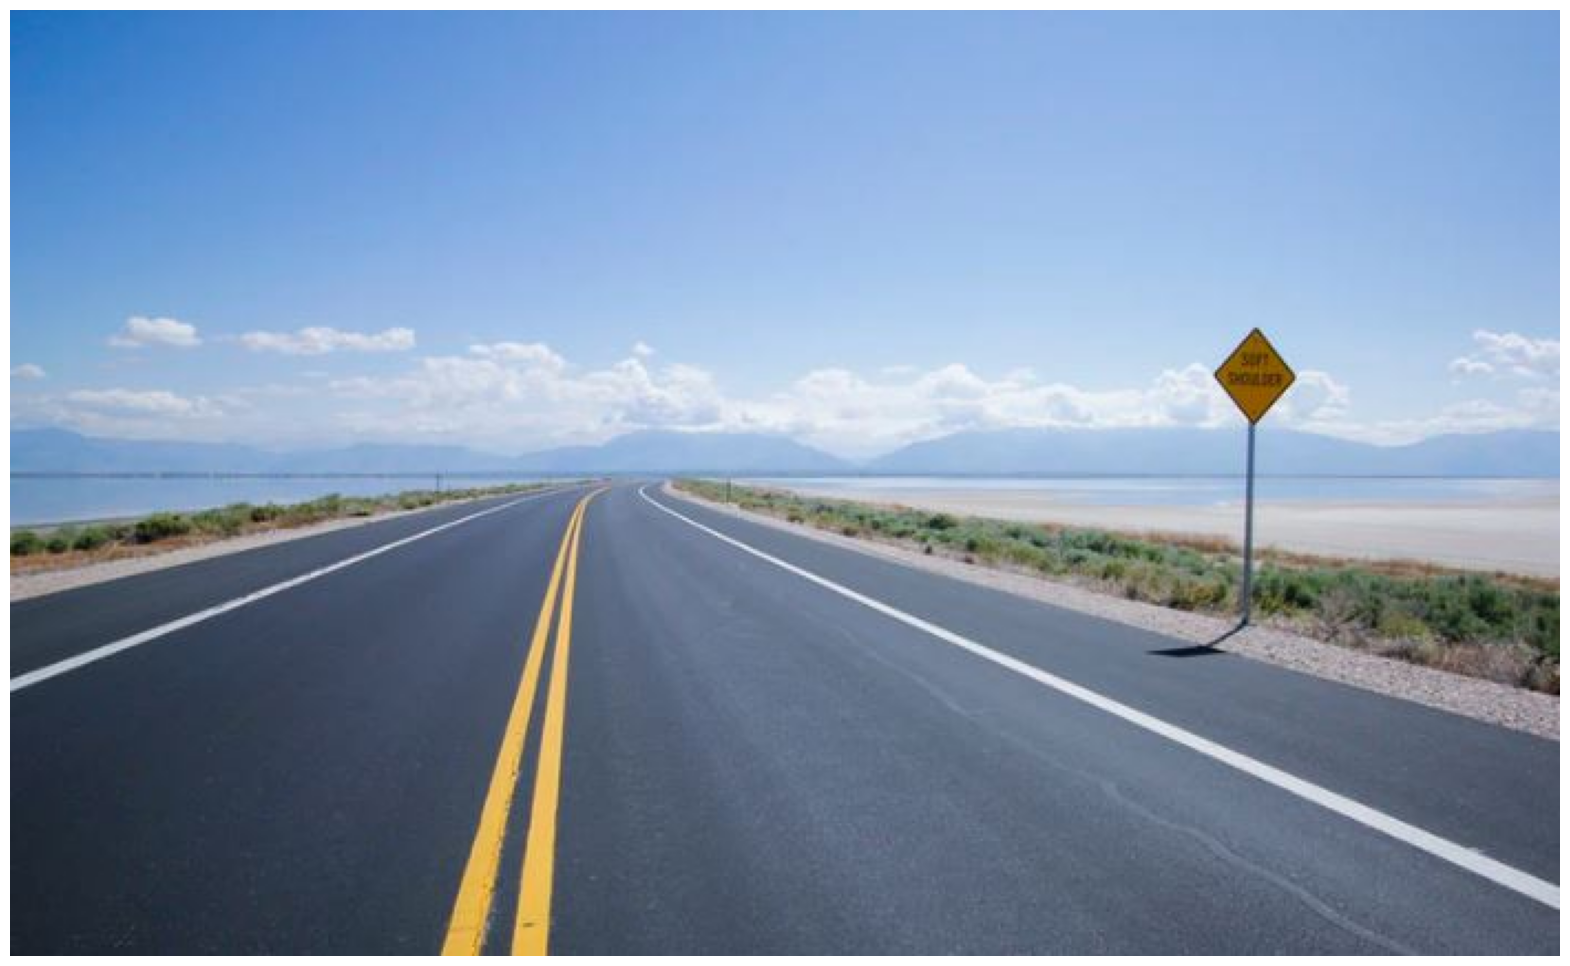

In [4]:
show(img)

In [5]:
blur_img = cv2.blur(img, (5,5))

In [6]:
edges = cv2.Canny(blur_img,150,255)

In [7]:
edges_org = cv2.Canny(img,150,255)

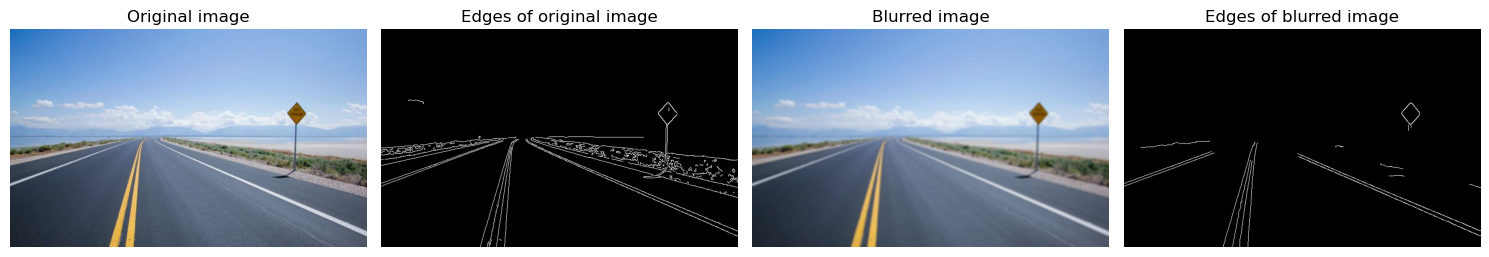

In [8]:
subplots([img,edges_org,blur_img,edges],nc=4, \
titles=['Original image','Edges of original image', \
'Blurred image','Edges of blurred image'],sz=15)

In [9]:
lines = cv2.HoughLines(edges,1,np.pi/180,100)
lines.shape

(9, 1, 2)

In [10]:
lines = lines[:,0,:]

In [11]:
lines.shape

(9, 2)

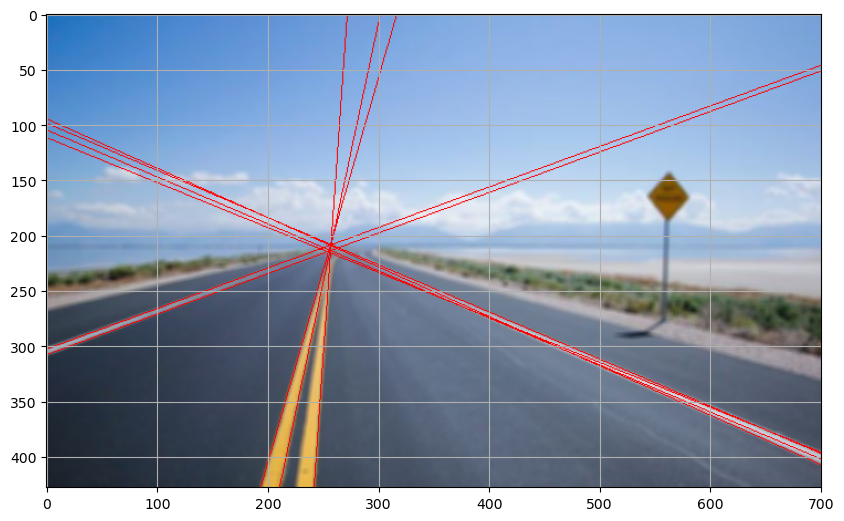

In [12]:
for rho, theta in lines:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 10000*(-b))
    y1 = int(y0 + 10000*(a))
    x2 = int(x0 - 10000*(-b))
    y2 = int(y0 - 10000*(a))
    if theta < 75*3.141/180 or theta > 105*3.141/180:
        cv2.line(blur_img,(x1,y1),(x2,y2),(255,0,0),1)
        
show(blur_img, sz=10, grid=True)